In [1]:
from maelzel import scoring
from maelzel.rational import Rat as F
from maelzel.scorestruct import ScoreStruct

In [2]:
struct = ScoreStruct(timesig='4/4', quarterTempo=70)


In [3]:
notes = [
    (60, F(2, 3)*F(2, 5)),
    (61, F(2, 3)*F(2, 5)),
    (62, F(2, 3)*F(2, 5)),
    (63, F(2, 3)*F(2, 5)),
    (64, F(2, 3)*F(2, 5)),
    #(65, F(2,3)),
    #(60, F(2, 7)),
    #(61, F(3, 7)),
    #(62, F(4, 7))
    
    
    ]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)


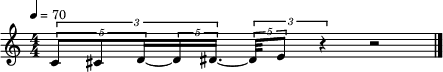

In [7]:
quantprofile = scoring.quant.makeQuantizationProfile('highest')
# quantprofile.debug=True
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r.write('~/tmp/foo.ly')
r

In [9]:
F(2, 3)*F(2, 5)

0.26666667

In [8]:
F(3, 11)

0.27272727

Score(1 voices)
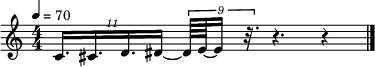

In [15]:
sco = r.score.toCoreScore()
sco

In [2]:
from maelzel.core import *

ConfigDict maelzel:core, saved at /home/em/.config/maelzel/core.yaml
There are keys defined in the saved config which are not present in the default config, they will be skipped: 
   {'quant.nestedTuples'}


In [3]:
c = getConfig()

In [4]:
c.reset()
c.save()

In [5]:
notes = [
    (60, F(1, 2)),
    (60.5, F(3, 2)),
    (61, F(1, 2)),
    #(62, F(1, 4)),
    (64, F(1, 10)),
    (65, F(1, 10)),
    (66, F(1, 10)),
    (67, F(1, 10)),
    (68, F(1, 10)),
    # (68, F(1, 3)),
    
    
    # (67.5, F(1, 3)*F(8, 7)),
    
    
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)

Best divisions: 


error,div,snapped,slots,info
0,"(2,)","[«0.000:0.500 4C», «0.500:1.000 4C+ tiedNext»]","[0, 1]","gridError=0, divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1091,"(5,)","[«0.000:0.400 4C», «0.400:1.000 4C+ tiedNext»]","[0, 2]","gridError=0.154, divPenalty=0.02 (0.0002, )"


Best divisions: 


error,div,snapped,slots,info
0,"(1,)",[«1.000:2.000 4C+ tiedPrev»],[0],"gridError=0, divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Best divisions: 


error,div,snapped,slots,info
0.001,"(1, 5)","[«2.000:2.500 4C#», «2.500:2.600 4E», «2.600:2.700 4F», «2.700:2.800 4F#», «2.800:2.900 4G», «2.900:3.000 4G#»]","[0, 1, 2, 3, 4, 5]","gridError=0, divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.031305,"(1, 1, 2, 2, 2)","[«2.000:2.500 4C#», «2.500:2.600 4E», «2.600:2.700 4F», «2.700:2.800 4F#», «2.800:2.900 4G», «2.900:3.000 4G#»]","[0, 3, 4, 5, 6, 7]","gridError=0, divPenalty=0.313 (0.00313, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0.7, levelPenalty=0)"
0.031321,"(1, 1, 5, 5)","[«2.000:2.500 4C#», «2.500:2.600 4E», «2.600:2.700 4F», «2.700:2.800 4F#», «2.800:2.900 4G», «2.900:3.000 4G#»]","[0, 2, 4, 6, 8, 10]","gridError=0, divPenalty=0.313 (0.003132, )"
0.049328,"(1, 1, 5, 4)","[«2.000:2.500 4C#», «2.500:2.600 4E», «2.600:2.700 4F», «2.700:2.812 4F#», «2.812:2.875 4G», «2.875:3.000 4G#»]","[0, 2, 4, 6, 8, 9]","gridError=0.0539, divPenalty=0.313 (0.003132, )"
0.049923,"(1, 1, 4, 5)","[«2.000:2.500 4C#», «2.500:2.625 4E», «2.625:2.688 4F», «2.688:2.800 4F#», «2.800:2.900 4G», «2.900:3.000 4G#»]","[0, 2, 4, 5, 7, 9]","gridError=0.055, divPenalty=0.313 (0.003132, )"
0.054003,"(1, 1, 3, 5)","[«2.000:2.500 4C#», «2.500:2.583 4E», «2.583:2.667 4F», «2.667:2.800 4F#», «2.800:2.900 4G», «2.900:3.000 4G#»]","[0, 2, 3, 4, 6, 8]","gridError=0.0622, divPenalty=0.313 (0.003131, divPenalty=0.005, cardinalityPenalty=0.1, numSubdivsPenalty=0.7, levelPenalty=0)"
0.056976,"(1, 1, 5, 3)","[«2.000:2.500 4C#», «2.500:2.600 4E», «2.600:2.700 4F», «2.700:2.833 4F#», «2.833:2.917 4G», «2.917:3.000 4G#»]","[0, 2, 4, 6, 8, 9]","gridError=0.0673, divPenalty=0.313 (0.003131, divPenalty=0.005, cardinalityPenalty=0.1, numSubdivsPenalty=0.7, levelPenalty=0)"
0.057919,"(1, 9)","[«2.000:2.500 4C#», «2.500:2.611 4E», «2.611:2.722 4F», «2.722:2.778 4F#», «2.778:2.889 4G», «2.889:3.000 4G#»]","[0, 1, 3, 5, 6, 8]","gridError=0.0819, divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.07305,"(1, 1, 2, 5)","[«2.000:2.500 4C#», «2.500:2.625 4E», «2.625:2.750 4F», «2.750:2.800 4F#», «2.800:2.900 4G», «2.900:3.000 4G#»]","[0, 2, 3, 4, 5, 7]","gridError=0.0933, divPenalty=0.313 (0.003131, divPenalty=0.005, cardinalityPenalty=0, numSubdivsPenalty=0.7, levelPenalty=0)"
0.075213,"(1, 8)","[«2.000:2.500 4C#», «2.500:2.625 4E», «2.625:2.688 4F», «2.688:2.812 4F#», «2.812:2.875 4G», «2.875:3.000 4G#»]","[0, 1, 3, 4, 6, 7]","gridError=0.106, divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"



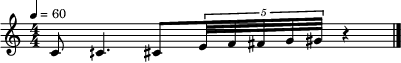

In [6]:
quantprofile = scoring.quant.makeQuantizationProfile('high', nestedTuples=False, divisionErrorWeight=0.01)
quantprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

In [7]:
from maelzel import scoring
from maelzel.rational import Rat as F
from maelzel.scorestruct import ScoreStruct

notes = [
    (61, F(2, 3)),
    (64, F(2, 3)),
    (65, F(1, 3)),
    (66, F(1, 3)),
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.Part(notations)

Best divisions: 


error,div,snapped,slots,info
0,"(3,)","[«0.000:0.667 4C#», «0.667:1.000 4E tiedNext»]","[0, 2]","gridError=0, divPenalty=0 (0, )"
0.072859,"(5,)","[«0.000:0.600 4C#», «0.600:1.000 4E tiedNext»]","[0, 3]","gridError=0.103, divPenalty=0.02 (0.001, )"


Best divisions: 


error,div,snapped,slots,info
0,"(3,)","[«1.000:1.333 4E tiedPrev», «1.333:1.667 4F», «1.667:2.000 4F#»]","[0, 1, 2]","gridError=0, divPenalty=0 (0, )"
0.13604,"(5,)","[«1.000:1.400 4E tiedPrev», «1.400:1.600 4F», «1.600:2.000 4F#»]","[0, 2, 3]","gridError=0.192, divPenalty=0.02 (0.001, )"



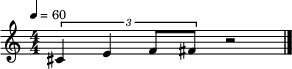

In [8]:
struct = ScoreStruct(timesig='4/4', quarterTempo=60)

quantprofile = scoring.quant.makeQuantizationProfile('high', nestedTuples=True, divisionErrorWeight=0.05)
quantprofile.debug=True

qpart = scoring.quant.quantizePart(part, struct=struct, profile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

Score(1 voices)
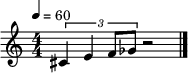

In [9]:
sco = r.score.toCoreScore()
sco

In [10]:
sco.play(sustain=0.05)



--Csound version 6.18 (double samples) Oct  1 2022
[commit: ac38f27d1c5d6ee0cacc1bc719e96be3a2d93a15]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=4)
    Synth(𝍪 preset._piano:501.0002, p4=0 idataidx_:5=15 inumbps:6=3 ibplen:7=3 igain_:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=61 ...)
    Synth(𝍪 preset._piano:501.0003, p4=0 idataidx_:5=15 inumbps:6=3 ibplen:7=3 igain_:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset._piano:501.0004, p4=0 idataidx_:5=15 inumbps:6=3 ibplen:7=3 igain_:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset._piano:501.0005, p4=0 idataidx_:5=15 inumbps:6=3 ibplen:7=3 igain_:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=66 ...)